In [1]:
#CTa-HW09-Surf's Up
#Part 03 - Climate Analysis

In [1]:
# import libraries to use
import pandas as pd
import numpy as np
from datetime import datetime, date

import matplotlib.pyplot as plt
from matplotlib import dates
import datetime
import matplotlib.ticker as mticker
import seaborn as sns

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func, text
from sqlalchemy import Column, Integer, String, Float, Date, DateTime

In [3]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()
#Base.metadata.create_all(conn)

In [4]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [5]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement to a variable called `measurement`
measurement = Base.classes.measurement

In [8]:
# Assign the station to a variable called `station`
station = Base.classes.station

In [9]:
# Create a session
session = Session(engine)

In [10]:
# Check SQL Lite to see if there is data in the tables for measurement
session.query(measurement.station).group_by(measurement.station).all()

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [11]:
# Check SQL Lite to see if there is data in the tables for station
session.query(station.name).group_by(station.name).all()

[('HONOLULU OBSERVATORY 702.2, HI US'),
 ('KANEOHE 838.1, HI US'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('MANOA LYON ARBO 785.2, HI US'),
 ('PEARL CITY, HI US'),
 ('UPPER WAHIAWA 874.3, HI US'),
 ('WAIHEE 837.5, HI US'),
 ('WAIKIKI 717.2, HI US'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US')]

In [12]:
# Precipitation Analysis
# Last 12 months of precipitation data
pa_results = pd.read_sql("SELECT date, prcp FROM measurement WHERE date between '2016-08-23' AND '2017-08-23';", conn)
pa_results['date'] = pd.to_datetime(pa_results['date'])
pa_results['month'] = pa_results['date'].dt.month
pa_results = pa_results.groupby(["month"]).sum()
pa_results

,prcp
month,
1,11.95
2,39.06
3,29.62
4,54.91
5,25.27
6,20.52
7,23.72
8,25.99
9,49.40


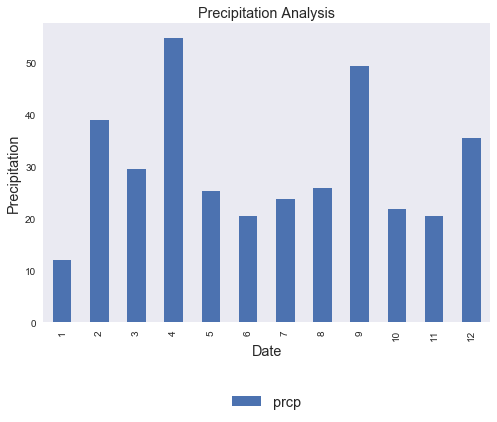

In [13]:
# Create bar chart for precipitation analysis
pa_results.plot.bar()
plt.legend(loc=9, bbox_to_anchor=(.5, -0.2), ncol=2, fontsize="large")
plt.xlabel('Date', fontsize="large")
plt.ylabel('Precipitation', fontsize="large")
#set_major_formatter(dates.DateFormatter('%m.%Y'))
print("")
plt.title('Precipitation Analysis', fontsize="large")
plt.grid()
#plt.savefig("PrecipitationAnalysis.png")
plt.show()

In [16]:
# Station Analysis
# Last 12 months of tobs data

sa_results = pd.read_sql("SELECT station, count(tobs) as 'observations' FROM measurement GROUP BY station ORDER BY observations DESC;",conn)
sa_results


,station,observations
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


In [20]:
#Get last 12 months of data
sa_analysis = pd.read_sql("SELECT station, tobs FROM measurement WHERE date between '2016-01-01' AND '2017-12-31';", conn)
sa_analysis = sa_analysis.groupby(["station"]).count()
sa_analysis

,tobs
station,
USC00513117,578
USC00514830,457
USC00516128,523
USC00517948,82
USC00519281,587
USC00519397,594
USC00519523,515


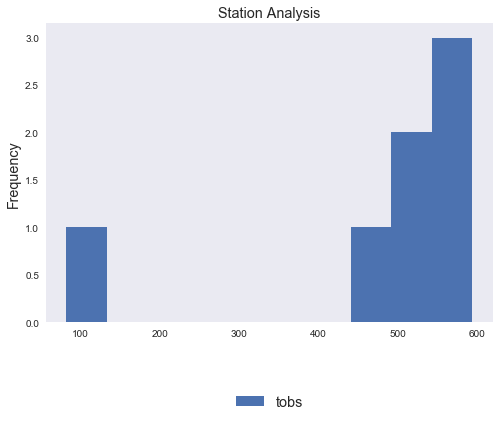

In [21]:
# Create a histogram chart for temperature analysis
sa_analysis.plot.hist()
plt.legend(loc=9, bbox_to_anchor=(.5, -0.2), ncol=2, fontsize="large")
plt.xlabel('', fontsize="large")
plt.ylabel('Frequency', fontsize="large")
print("")
plt.title('Station Analysis', fontsize="large")
plt.grid()
plt.show()

In [40]:
# Function to return avg temp for date range

calc_temps = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
                         filter(measurement.date.between('2017-08-10','2017-08-23')).\
                         all()
        
calc_temps

[(70, 84, 78.65306122448979)]

In [48]:
ta_analysis = list(np.ravel(calc_temps))
ta_analysis

[70.0, 84.0, 78.65306122448979]

In [49]:
mintemp = ta_analysis[0]
maxtemp = ta_analysis[1]
avgtemp = ta_analysis[2]

In [51]:
mintemp

70.0

In [52]:
maxtemp

84.0

In [53]:
avgtemp

78.65306122448979

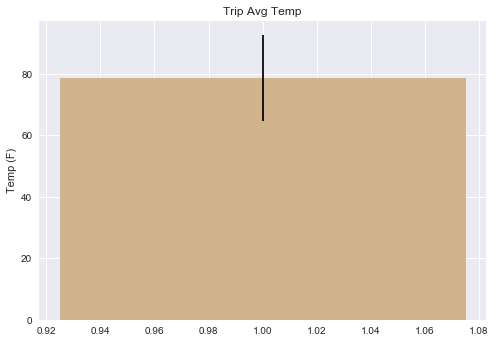

In [59]:
# Create a bar graph for temperature analysis

peak = maxtemp - mintemp

plt.bar(1,avgtemp, width = 0.15, color='tan', yerr=peak)


# add some text for labels, title and axes ticks
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')

plt.show()